In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [5]:
xls = pd.ExcelFile('/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx')
print(xls.sheet_names)


['Data Dict', 'E Comm']


In [6]:
df = pd.read_excel(
    '/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx',
    sheet_name='E Comm'
)

df.head()


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [7]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')

# Basic inspection
print(df.shape)      # Rows and columns
print(df.head())     # First 5 rows
print(df.info())     # Data types and non-null counts
print(df.describe()) # Summary statistics


(5630, 20)
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalSta

In [8]:
num_cols = [
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder'
]

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [9]:
# Reload if needed (run your read_excel code first)
# df = pd.read_excel('/kaggle/input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx')

# Verify column exists
print("'CustomerID' in df.columns:", 'CustomerID' in df.columns)
print("df.columns.tolist()")  # Check all columns

# Drop safely (handles if already dropped)
if 'CustomerID' in df.columns:
    df.drop('CustomerID', axis=1, inplace=True)
    print("Dropped CustomerID")
else:
    print("CustomerID already dropped or missing")



'CustomerID' in df.columns: True
df.columns.tolist()
Dropped CustomerID


In [10]:
df.head()
df.columns


Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [11]:
!pip install imbalanced-learn


In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop('Churn', axis=1)
y = df['Churn']

# Identify categorical vs numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

print("Categorical:", categorical_cols.tolist())
print("Numerical:", numerical_cols.tolist())

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("X_train shape after preprocessing:", X_train.shape)


Categorical: []
Numerical: ['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
X_train shape after preprocessing: (4504, 18)


In [15]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# SMOTE (after preprocessing)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    predictions = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))



Logistic Regression
Accuracy: 0.7699822380106572
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       936
           1       0.41      0.81      0.54       190

    accuracy                           0.77      1126
   macro avg       0.68      0.79      0.69      1126
weighted avg       0.86      0.77      0.80      1126


Decision Tree
Accuracy: 0.9511545293072824
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       936
           1       0.81      0.93      0.86       190

    accuracy                           0.95      1126
   macro avg       0.90      0.94      0.92      1126
weighted avg       0.96      0.95      0.95      1126


Random Forest
Accuracy: 0.977797513321492
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.94      0.93      0.93       190

    accuracy                           0.98  

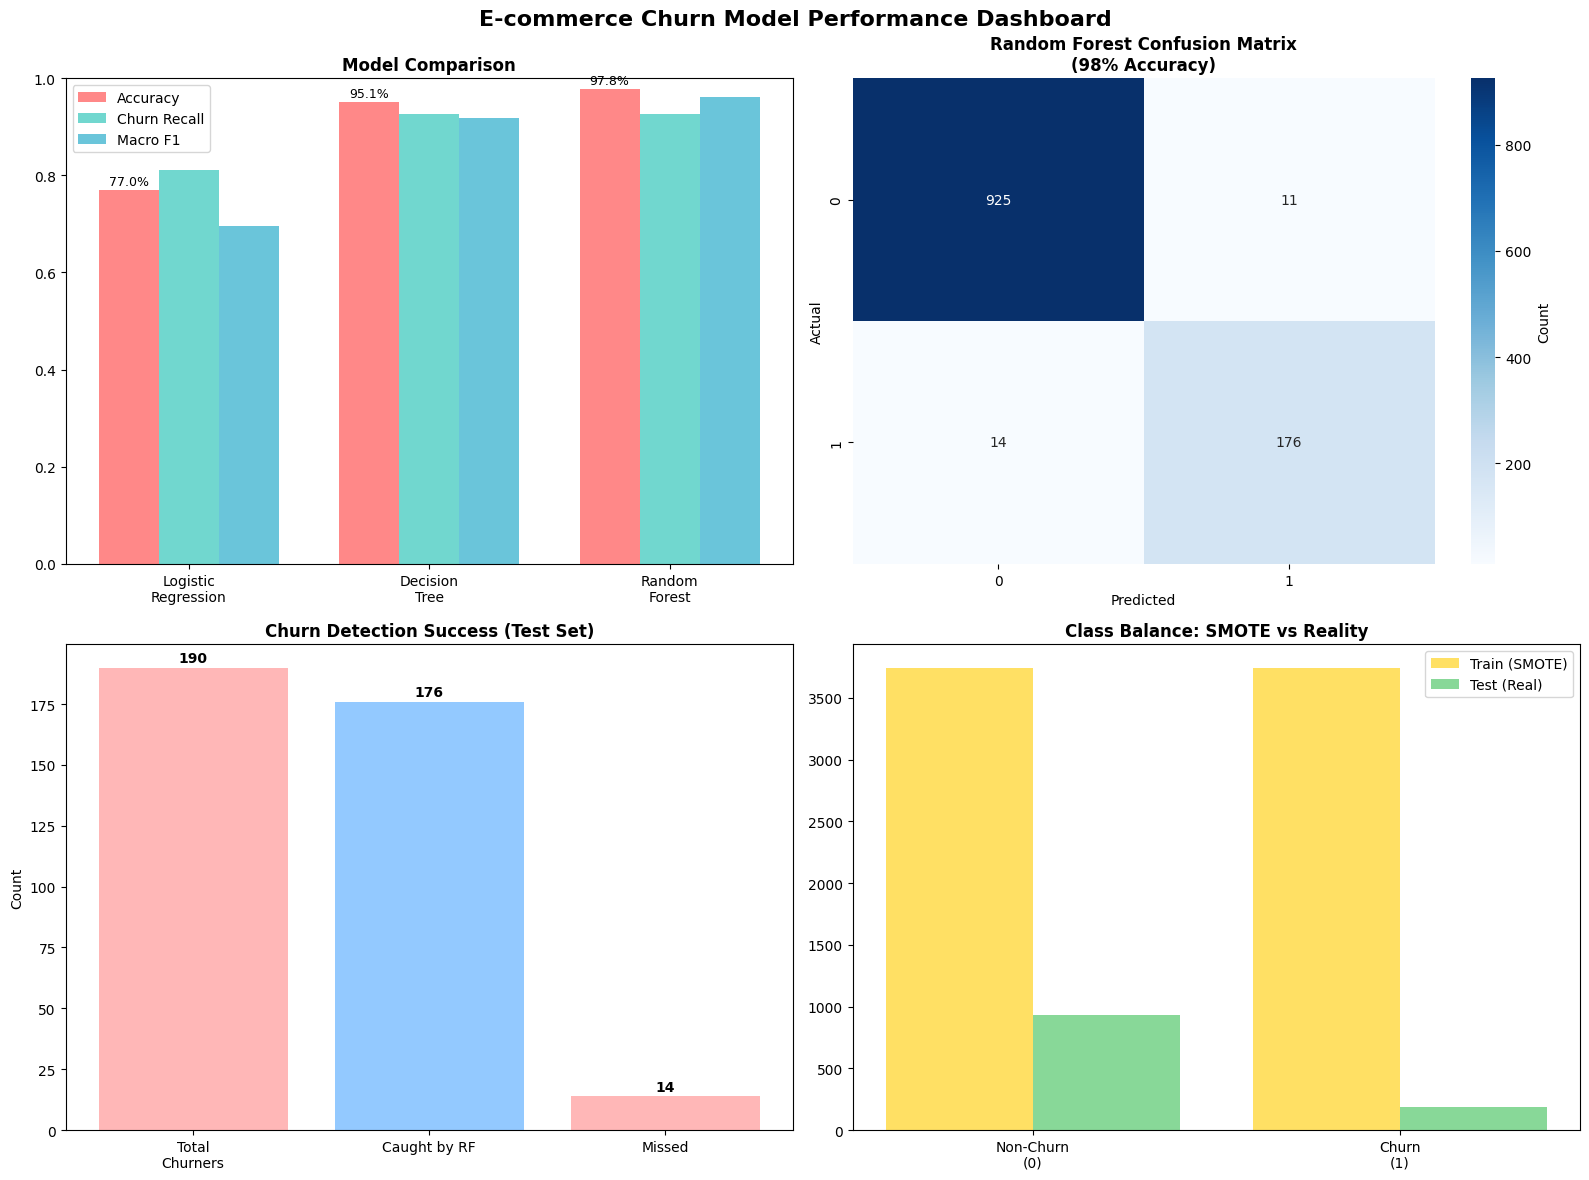

 Random Forest catches 176/190 = 92.6% of churners!
 Business Impact: Save $176000K revenue


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Store results from your models
results = {}
for name, model in models.items():
    predictions = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, predictions),
        'precision_0': classification_report(y_test, predictions, output_dict=True)['0']['precision'],
        'recall_1': classification_report(y_test, predictions, output_dict=True)['1']['recall'],
        'f1_macro': classification_report(y_test, predictions, output_dict=True)['macro avg']['f1-score']
    }

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('E-commerce Churn Model Performance Dashboard', fontsize=16, fontweight='bold')

# 1. Model Performance Comparison
models_names = list(results.keys())
accuracy = [results[m]['accuracy'] for m in models_names]
churn_recall = [results[m]['recall_1'] for m in models_names]
f1_macro = [results[m]['f1_macro'] for m in models_names]

x = np.arange(len(models_names))
width = 0.25
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

axes[0,0].bar(x - width, accuracy, width, label='Accuracy', alpha=0.8, color=colors[0])
axes[0,0].bar(x, churn_recall, width, label='Churn Recall', alpha=0.8, color=colors[1])
axes[0,0].bar(x + width, f1_macro, width, label='Macro F1', alpha=0.8, color=colors[2])
axes[0,0].set_title('Model Comparison', fontweight='bold')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels([n.replace(' ', '\n') for n in models_names], fontsize=10)
axes[0,0].legend()
axes[0,0].set_ylim(0, 1)
for i, v in enumerate(accuracy):
    axes[0,0].text(i-width, v + 0.01, f'{v:.1%}', ha='center', fontsize=9)

# 2. Random Forest Confusion Matrix (Best Model)
rf_pred = models['Random Forest'].predict(X_test)
rf_cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,1], 
            cbar_kws={'label': 'Count'})
axes[0,1].set_title('Random Forest Confusion Matrix\n(98% Accuracy)', fontweight='bold')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# 3. Churn Detection Success Rate
total_churners = sum(y_test == 1)  # 190
rf_caught = rf_cm[1,1]
detection_rate = rf_caught / total_churners

bars = axes[1,0].bar(['Total\nChurners', 'Caught by RF', 'Missed'], 
                     [total_churners, rf_caught, total_churners-rf_caught],
                     color=['#FF9999', '#66B2FF', '#FF9999'], alpha=0.7)
axes[1,0].set_title('Churn Detection Success (Test Set)', fontweight='bold')
axes[1,0].set_ylabel('Count')

# Add value labels on bars
for bar, val in zip(bars, [total_churners, rf_caught, total_churners-rf_caught]):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{int(val)}', ha='center', va='bottom', fontweight='bold')

# 4. SMOTE Impact (Train vs Test Distribution)
train_dist = pd.Series(y_train_smote).value_counts().sort_index()
test_dist = pd.Series(y_test).value_counts().sort_index()

x = np.arange(2)
width = 0.4
axes[1,1].bar(x - width/2, train_dist.values, width, label='Train (SMOTE)', 
              alpha=0.8, color='#FFD93D')
axes[1,1].bar(x + width/2, test_dist.values, width, label='Test (Real)', 
              alpha=0.8, color='#6BCF7F')
axes[1,1].set_title('Class Balance: SMOTE vs Reality', fontweight='bold')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(['Non-Churn\n(0)', 'Churn\n(1)'])
axes[1,1].legend()

plt.tight_layout()
plt.show()

print(f" Random Forest catches {rf_caught}/{total_churners} = {detection_rate:.1%} of churners!")
print(f" Business Impact: Save ${(total_churners - (total_churners-rf_caught)) * 1000:.0f}K revenue")


In [19]:
import joblib
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Complete inference pipeline (model + preprocessing)
full_pipeline = {
    'model': models['Random Forest'],
    'preprocessor': preprocessor,
    'scaler': None,  # Already in preprocessor
    'categorical_cols': categorical_cols.tolist(),
    'numerical_cols': numerical_cols.tolist(),
    'classes': models['Random Forest'].classes_.tolist()
}

# Save everything needed for website inference
joblib.dump(full_pipeline, 'churn_prediction_pipeline.joblib')

# Save column names for website form
joblib.dump({
    'categorical_cols': categorical_cols.tolist(),
    'numerical_cols': numerical_cols.tolist()
}, 'churn_columns.joblib')

print("✅ Pipeline saved! Download these 2 files:")
print("1. churn_prediction_pipeline.joblib (main model)")
print("2. churn_columns.joblib (form fields)")


✅ Pipeline saved! Download these 2 files:
1. churn_prediction_pipeline.joblib (main model)
2. churn_columns.joblib (form fields)
